<h1>
Week 2
</h1>
<h2>
Task 1: Uniform distributions
</h2>
<h3>
The aim in this notebook is to build confidence generating random numbers using numpy, and visualising distributions using matplotlib.
</h3>

In [1]:
# A few useful import statements
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import time

<p style="font-size:20px">
numpy.random.uniform() allows us to generate a random number between 0 and 1
</p>

In [2]:
for _ in range(10):
    number = rand.uniform()
    # Use a formatted fstring with 4 decimal places
    print(f"{number:.4f}")

0.8709
0.7057
0.6553
0.4432
0.8921
0.5178
0.8528
0.5645
0.3616
0.7247


<p style="font-size:20px">
Looking at the <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html">documentation</a> we see that we have 3 optional arguments: low, high, size
</p>

In [3]:
my_numbers = rand.uniform(low=-5.5, high=7, size=1_000)
print(f"Shape of numbers array is {my_numbers.shape}")
print(my_numbers[:10])

Shape of numbers array is (1000,)
[-0.9197682  -2.12490081  3.97277173  3.11727044  2.5150358  -1.29225628
 -2.75144046  1.12606243  5.41336464 -1.67434549]


<p style="font-size:20px">
Let's visualise the distribution using <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">matplotlib.pyplot.hist</a>
</p>

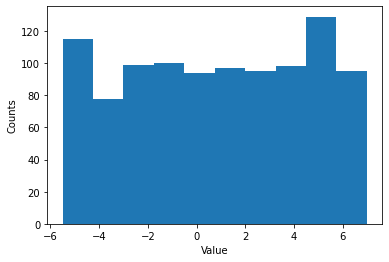

<Figure size 432x288 with 0 Axes>

In [4]:
# Prepare figure
fig, ax = plt.subplots()
ax.set(xlabel="Value", ylabel="Counts")

# Plot data
ax.hist(my_numbers)

# Plot and close figure
plt.show()
plt.clf()

<p style="font-size:20px;color:Blue;">
$\cdot$ Change the number of points in the random sample and inspect the fluctuation in the histogram. Can you explain what you see?
</p>

<hr style="height:1px;width:75%">

<p style="font-size:20px">
Let's do our first MC integral. As explained in the notes we can estimate an integral using random variables:
    $$ \int_{x_1}^{x_2} f(x){\rm d}x \approx (x_2-x_1)\frac{1}{N}\sum_{i=1}^{N}f(x_i). $$
<br>
Let's first integrate a simple $y=x$ line between $0$ and $10$. This is given by
    $$ I = \int_0^{10} x {\rm d}x = \bigg[\frac{x^2}{2}\bigg]_0^{10}= \frac{10^2}{2} = 50 $$
</p>

In [5]:
# Get x samples from flat probability
sample = rand.uniform(low=0, high=10, size=100_000)

# Perform the "integral"
expectation = (10-0)*np.sum(sample)/len(sample)

# Show fstring formatted result
print(f"{expectation:.4f}")

50.0687


<p style="font-size:20px">
The method gives the correct result! We swapped an integral for random numbers.
</p>

<p style="font-size:20px;color:blue">
$\cdot$ Change the number of points and inspect the accuracy of the expectation value.
<br><br>
$\cdot$ Use the same sample to estimate the standard deviation of the random sample. Remember the definition
    $$ \sigma_f^2 = \langle f(x)\rangle^2 - \langle f(x)^2 \rangle $$
I have started off the code for you below, by calculating the expectation values of $f$ and $f^2$.
<br>
$\cdot$ Use the above result to find the error on the integral. Remember the definition
    $$ \sigma_{\rm MC} = \frac{V}{\sqrt{N}}\sigma_f $$
<br>
Notice how the value of $\sigma_f$ does not change significantly if you increase $N$ (just getting a bit more accurate), while $\sigma_{\rm MC}$ scales as $1/\sqrt{N}$.
<br>
$\cdot$ Check that if you rerun your Monte Carlo integral cell a few times, the variation in its result is consistent with the value of $\sigma_{\rm MC}$.
</p>

In [6]:
exp = np.sum(sample)/len(sample)
exp2 = np.sum(sample**2)/len(sample)

<hr style="height:1px;width:75%">

<p style="font-size:20px;color:blue">
$\cdot$ Bonus question: Test the speed of the numpy.random.uniform function. How much faster is it to use the size argument compared to repeatedly calling the function (e.g. appending values to an array in a for loop)?
</p>